## 1- Objetivo
 
 - Encontrar o melhor modelo para a previsão de faturamento.
 

 - Importando os dados pre-processados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import date

In [2]:
url = 'https://raw.githubusercontent.com/robertferro/studio-estetica/main/1%20-%20EDA/dados_modelagem.csv'

In [3]:
dados = pd.read_csv(url)

In [4]:
dados.head()

,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,...,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento,dia,ano,mes,dia_da_semana
0,2018-12-22,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,7.0,270.0,23,2018,12,sabado
1,2018-12-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,24,2018,12,segunda
2,2018-12-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,25,2018,12,terca
3,2018-12-26,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,560.0,26,2018,12,quarta
4,2018-12-27,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2.0,90.0,27,2018,12,quinta


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   data_atendimento        740 non-null    object 
 1   design_de_sobrancelhas  740 non-null    float64
 2   design_coloracao        740 non-null    float64
 3   design_coloracao_buco   740 non-null    float64
 4   buco                    740 non-null    float64
 5   brown_lamination        740 non-null    float64
 6   micropigmentacao        740 non-null    float64
 7   extensao_de_cilios      740 non-null    float64
 8   lash_lifting            740 non-null    float64
 9   limpeza_de_pele         740 non-null    float64
 10  microagulhamento        740 non-null    float64
 11  peeling_quimico         740 non-null    float64
 12  massagem_relaxante      740 non-null    float64
 13  pacote_massagem_5       740 non-null    float64
 14  drenagem_linfatica      740 non-null    fl

## 2. Manipulação de dados.


 - Criando novas colunas referentes a data que vão auxiliar o algoritmo.

- Convertendo a coluna data_atendimento para formato datetime.

In [6]:
dados['data_atendimento'] = pd.to_datetime(dados['data_atendimento'],format=r"%Y/%m/%d")

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   data_atendimento        740 non-null    datetime64[ns]
 1   design_de_sobrancelhas  740 non-null    float64       
 2   design_coloracao        740 non-null    float64       
 3   design_coloracao_buco   740 non-null    float64       
 4   buco                    740 non-null    float64       
 5   brown_lamination        740 non-null    float64       
 6   micropigmentacao        740 non-null    float64       
 7   extensao_de_cilios      740 non-null    float64       
 8   lash_lifting            740 non-null    float64       
 9   limpeza_de_pele         740 non-null    float64       
 10  microagulhamento        740 non-null    float64       
 11  peeling_quimico         740 non-null    float64       
 12  massagem_relaxante      740 non-null    float64   

###  Excluindo os dados referentes ao periodo da pandemia e aos dias de domingo.
 
     Pandemia: Período de 20 de março a 1 de julho.

In [8]:
dados.loc[453:556]

,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,...,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento,dia,ano,mes,dia_da_semana
453,2020-03-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,20,2020,3,sexta
454,2020-03-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,21,2020,3,sabado
455,2020-03-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,22,2020,3,domingo
456,2020-03-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,23,2020,3,segunda
457,2020-03-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,24,2020,3,terca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,2020-06-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,27,2020,6,sabado
553,2020-06-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,28,2020,6,domingo
554,2020-06-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,29,2020,6,segunda
555,2020-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,30,2020,6,terca


In [9]:
dados_pandemia =[]
for i in range(453,556):
    dados_pandemia.append(i)

dados = dados.drop(dados_pandemia)
dados = dados.reset_index()
dados = dados.drop('index', axis = 1)
dados.head()

,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,...,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento,dia,ano,mes,dia_da_semana
0,2018-12-22,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,7.0,270.0,23,2018,12,sabado
1,2018-12-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,24,2018,12,segunda
2,2018-12-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,25,2018,12,terca
3,2018-12-26,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,560.0,26,2018,12,quarta
4,2018-12-27,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2.0,90.0,27,2018,12,quinta


 - Removendo os domingos.

In [10]:
dados = dados.set_index('dia_da_semana')
dados = dados.drop('domingo')
dados = dados.reset_index()

In [11]:
dados.dia_da_semana.value_counts()

quinta     92
quarta     92
terca      91
sabado     91
segunda    91
sexta      90
Name: dia_da_semana, dtype: int64

In [12]:
dados.shape

(547, 22)

In [13]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   dia_da_semana           547 non-null    object        
 1   data_atendimento        547 non-null    datetime64[ns]
 2   design_de_sobrancelhas  547 non-null    float64       
 3   design_coloracao        547 non-null    float64       
 4   design_coloracao_buco   547 non-null    float64       
 5   buco                    547 non-null    float64       
 6   brown_lamination        547 non-null    float64       
 7   micropigmentacao        547 non-null    float64       
 8   extensao_de_cilios      547 non-null    float64       
 9   lash_lifting            547 non-null    float64       
 10  limpeza_de_pele         547 non-null    float64       
 11  microagulhamento        547 non-null    float64       
 12  peeling_quimico         547 non-null    float64   

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000244CE035DF0>,
      dtype=object)

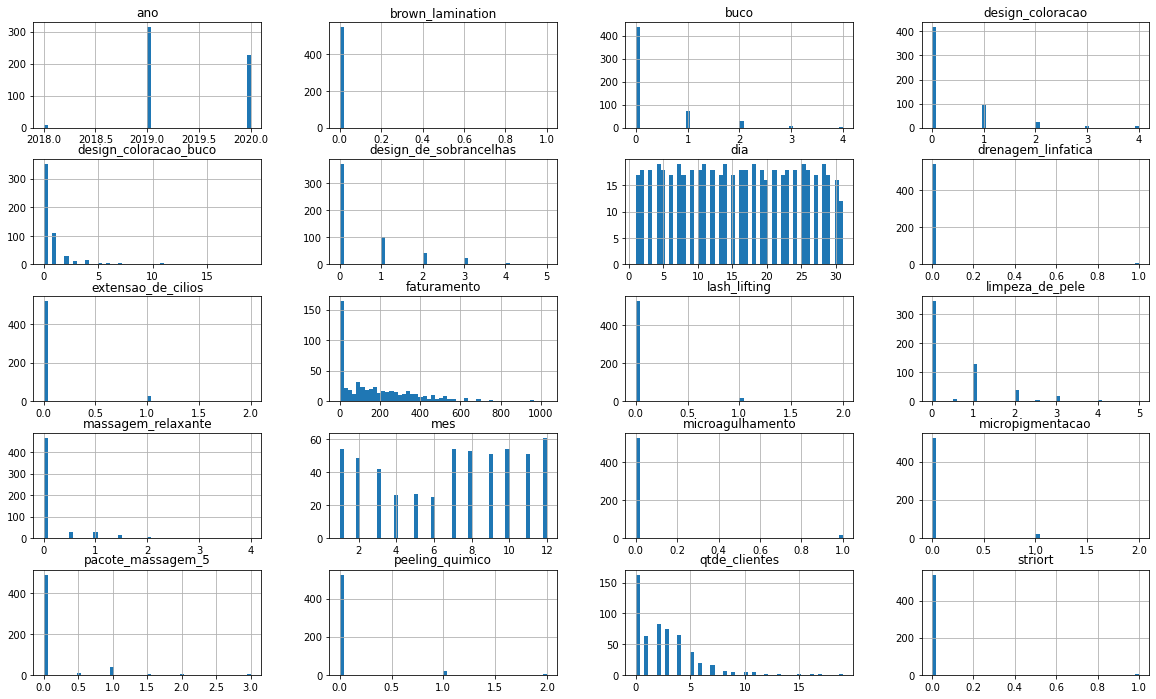

In [14]:
dados.hist(bins=50, figsize=(20,12))

 ## 4. Machine learning

 - Selecionando apenas as colunas que  importam para a modelagem.

In [15]:
dados_ml = dados[['qtde_clientes','dia','mes','dia_da_semana','faturamento']]

In [16]:
dados_ml = dados_ml[['dia','mes','dia_da_semana','qtde_clientes','faturamento']]

 - Transformando variáveis categóricas em variáveis numéricas.

In [17]:
dados_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dia            547 non-null    int64  
 1   mes            547 non-null    int64  
 2   dia_da_semana  547 non-null    object 
 3   qtde_clientes  547 non-null    float64
 4   faturamento    547 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 21.5+ KB


In [18]:
dic_dia_semana = {'segunda':1, 'terca':2,'quarta':3, 'quinta':4 ,'sexta':5, 'sabado':6 }

In [19]:
dados_ml['dia_da_semana'] = dados_ml['dia_da_semana'].map(dic_dia_semana)


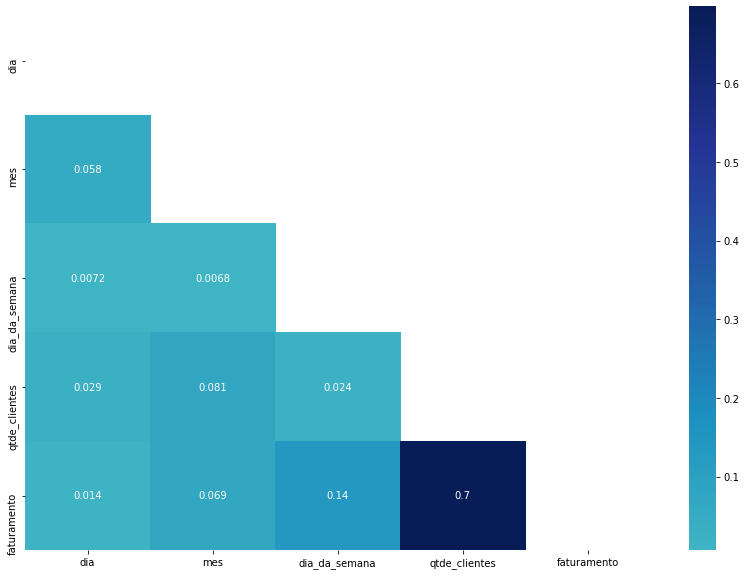

In [20]:
plt.figure(figsize=(14,10))

corr = dados_ml.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, mask=mask, annot=True, center=0, cmap="YlGnBu")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000244D0301B50>,
      dtype=object)

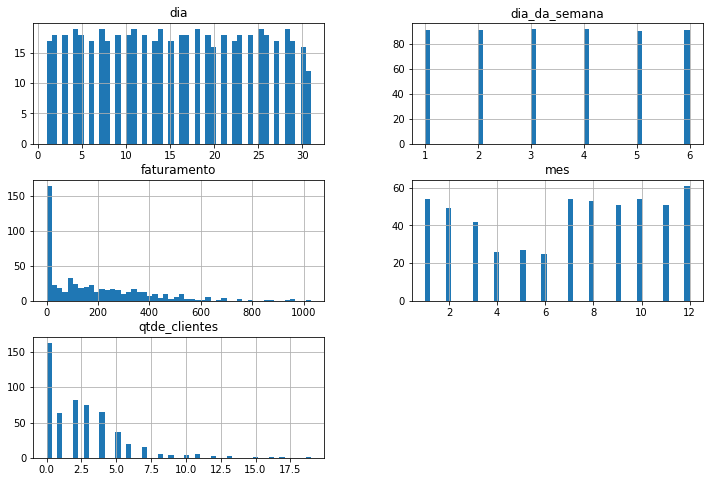

In [21]:
dados_ml.hist(bins=50, figsize=(12,8))

 - Normalizando os dados.

In [22]:
dados_ml['faturamento']=dados_ml['faturamento'].apply(np.log1p)
# dados['qtde_clientes']=dados['qtde_clientes'].apply(np.log1p)

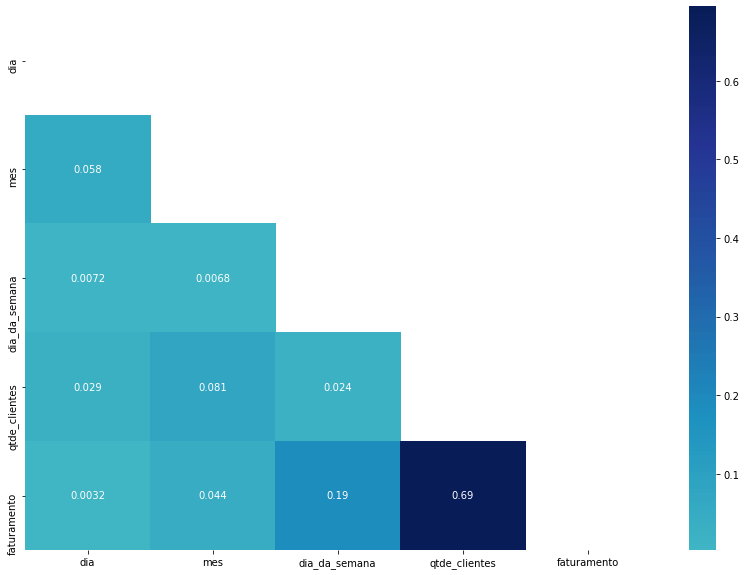

In [23]:
plt.figure(figsize=(14,10))

corr = dados_ml.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, mask=mask, annot=True, center=0, cmap="YlGnBu")

 - Separando as amostras de treino e teste.

In [24]:
X = dados_ml[['dia_da_semana','qtde_clientes']]
Y = dados_ml['faturamento']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_treino,X_teste,Y_treino,Y_teste = train_test_split(X,Y,test_size=0.25,random_state=0, shuffle=False)

 - Visualizando X_teste e X_treino.

In [27]:
X_treino.tail()

,dia_da_semana,qtde_clientes
405,1,0.0
406,2,0.0
407,3,0.0
408,4,1.0
409,5,0.0


In [28]:
X_teste.head()

,dia_da_semana,qtde_clientes
410,6,0.0
411,1,0.0
412,2,2.0
413,3,3.0
414,4,0.0


 - Com essa divisão, sem aleatoriedade, garantimos que não haja vazamento de dados do conjunto de teste.
    
 - Esse vazamento iria interferir no resultado do modelo.

 - Modelo "Baseline" (Ponto de partida)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()
lr.fit(X_treino, Y_treino)
lr.score(X_teste, Y_teste)

0.4801556560987267

In [31]:
y_pred = lr.predict(X_teste)

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [33]:
MAE  = mean_absolute_error(Y_teste,y_pred)
MSE  = mean_squared_error(Y_teste,y_pred)
RMSE = np.sqrt(mean_squared_error(Y_teste,y_pred))
R2 = r2_score(Y_teste, y_pred)

print('MAE = {:0.4f}'.format(MAE))
print('MSE = {:0.4f}'.format(MSE))
print('RMSE = {:0.4f}'.format(RMSE))
print('R2 = {:0.4f}'.format(R2))

MAE = 1.6329
MSE = 3.3512
RMSE = 1.8306
R2 = 0.4802


 - Machine learning

In [34]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X_treino,Y_treino)

KNeighborsRegressor(n_neighbors=3)

In [35]:
y_pred = neigh.predict(X_teste)

In [36]:
# Root Mean Squared Error
np.sqrt(np.mean((y_pred-Y_teste.values)**2))

0.5981198482320027

In [37]:
# Mean Squared Error
np.mean((y_pred-Y_teste.values)**2)

0.3577473528490739

In [38]:
# Mean Absolute Error
np.mean(np.abs(y_pred-Y_teste.values))

0.40611317385315404

In [39]:
# R2 Score
from sklearn.metrics import r2_score
r2_score(Y_teste, y_pred)

0.9445062652056588

 - Triagem com outros modelos

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor


regressor_list = [
                  DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor(),
           
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_treino, Y_treino)
  train_score = reg.score(X_treino, Y_treino)
  test_score = reg.score(X_teste, Y_teste)
  print('Train score', train_score)
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 0.9507749754860417
Test score 0.9536969003648386
Treinando RandomForestRegressor
Train score 0.9505334843685359
Test score 0.9549571829420542
Treinando MLPRegressor
Train score 0.8806754303179279
Test score 0.8661939593244552
Treinando XGBRegressor
Train score 0.9507745769750697
Test score 0.9537250383995752


C:\Users\Biena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


- Repetindo com validação cruzada.

In [41]:
# repetindo processo com validação cruzada
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score


regressor_list = [
                  DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor(),
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_treino, Y_treino)
  train_score = reg.score(X_treino, Y_treino)
  val_score = cross_val_score(reg, X_treino, Y_treino, cv=5)
  test_score = reg.score(X_teste, Y_teste)
  print('Train score', train_score)
  print('Validation score', val_score.mean())
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 0.9507749754860417
Validation score 0.9312448590248724
Test score 0.9536969003648386
Treinando RandomForestRegressor
Train score 0.9505544730517279
Validation score 0.9334644578178125
Test score 0.9543542865928639
Treinando MLPRegressor
Train score 0.9090597232270967
Validation score 0.8320219853740582
Test score 0.8959026193305045
Treinando XGBRegressor
Train score 0.9507745769750697
Validation score 0.9323174767033903
Test score 0.9537250383995752


 - De acordo com os scores acima, o modelo que obteve o melhor resultado foi RandomForest.
 
 - Agora vamos calcular o erro.

In [42]:
reg = RandomForestRegressor()

In [43]:
reg.fit(X_treino, Y_treino)

RandomForestRegressor()

In [44]:
y_pred = reg.predict(X_teste)

In [45]:
MAE  = mean_absolute_error(Y_teste,y_pred)
MSE  = mean_squared_error(Y_teste,y_pred)
RMSE = np.sqrt(mean_squared_error(Y_teste,y_pred))
R2 = r2_score(Y_teste, y_pred)

print('MAE = {:0.8f}'.format(MAE))
print('MSE = {:0.8f}'.format(MSE))
print('RMSE = {:0.8f}'.format(RMSE))
print('R2 = {:0.8}'.format(R2))

MAE = 0.37716848
MSE = 0.29417878
RMSE = 0.54238251
R2 = 0.95436702


In [46]:
X_teste.head(7)

,dia_da_semana,qtde_clientes
410,6,0.0
411,1,0.0
412,2,2.0
413,3,3.0
414,4,0.0
415,5,4.0
416,6,1.0


In [47]:
Y_teste.head(7)

410    0.000000
411    0.000000
412    4.110874
413    4.262680
414    0.000000
415    5.198497
416    6.634633
Name: faturamento, dtype: float64

In [48]:
reg.predict([[2,2]])

array([4.72099948])

In [49]:
reg.predict([[6,1]])

array([4.64758418])

In [50]:
reg.predict([[5,4]])

array([5.47641977])

 - Visualizando o comportamento do  y_pred e Y_teste.

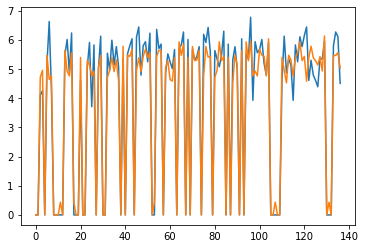

In [51]:
plt.plot(Y_teste.values)
plt.plot(y_pred)

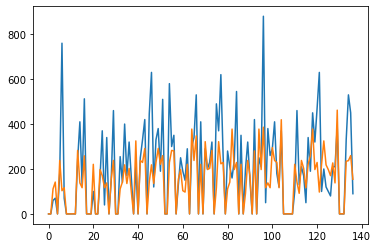

In [52]:
plt.plot(np.expm1(Y_teste.values))
plt.plot(np.expm1(y_pred))

In [53]:
import pickle
# now you can save it to a file
with open('randomforest_regression.pkl', 'wb') as f:
    pickle.dump(reg, f)